#**Natural Language Toolkit (NLTK)**,

É uma das principais bibliotecas de processamento de linguagem natural em Python,vamos ver como ela pode ser usada para analisar textos em português.

## 2. Configuração do Ambiente

Antes de começarmos com as análises, precisamos configurar nosso ambiente de trabalho instalando e importando os pacotes necessários. Além disso, faremos o download de alguns recursos do NLTK, como os pacotes de stopwords e stemming em português.



In [ ]:
# Instalar e importar pacotes necessários
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

# Baixar pacotes necessários
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

---

#### **2.1 Ferramentas e Bibliotecas**

Nesta célula, estamos preparando o ambiente para análise de texto em português. Abaixo está uma descrição do que cada linha de código faz:

- **`!pip install nltk`**: Instala o NLTK (*Natural Language Toolkit*), uma biblioteca essencial para processamento de linguagem natural em Python.
- **`import nltk`**: Importa a biblioteca NLTK para uso no nosso código.
- **`from nltk.tokenize import word_tokenize`**: Importa a função `word_tokenize` para dividir textos em palavras individuais (tokens).
- **`from nltk.corpus import stopwords`**: Importa a lista de *stopwords* (palavras comuns como "e", "a", "o" que geralmente são removidas da análise).
- **`from nltk.stem import RSLPStemmer`**: Importa o *stemmer* RSLP, que reduz palavras ao seu radical (*stemming*), agrupando variações de uma mesma palavra.
- **`nltk.download('punkt')`**: Baixa os dados necessários para tokenização.
- **`nltk.download('stopwords')`**: Baixa a lista de *stopwords* em português.
- **`nltk.download('rslp')`**: Baixa os dados para o *stemmer* RSLP.

Com essas ferramentas, poderemos realizar diversas tarefas de processamento de texto, como tokenização, remoção de *stopwords* e *stemming*, preparando os dados para análises mais avançadas.

---



##**3. Tokenização**

Vamos começar com tokenização, que é o processo de dividir o texto em palavras individuais.

*Isso* nos permite analisar cada palavra separadamente.

In [ ]:
# Exemplo com um texto aleatório. Experimentem novos textos e vejam os resultados.
texto = "Este é um exemplo de análise de texto usando NLTK no Jupyter Notebook."
tokens = word_tokenize(texto, language='portuguese')
print(tokens)

['Este', 'é', 'um', 'exemplo', 'de', 'análise', 'de', 'texto', 'usando', 'NLTK', 'no', 'Jupyter', 'Notebook', '.']


***Observe como o texto foi dividido em palavras.***

Isso nos permite tratar cada palavra como uma unidade separada, o que é crucial para análises mais detalhadas.


---



##**4. Stopwords**

####**Definição**

Stopwords são palavras muito comuns em um idioma, como "e", "a", "de", "o", "para", que não carregam informações significativas para análises textuais.

`(lembram do exemplo em R da aula passada?)`

####**Função no Texto**

* Essas palavras são essenciais para a estrutura gramatical e fluência do texto, mas geralmente não contribuem para o significado central ou para a extração de informações relevantes.

####**Por que Remover Stopwords?**


**Redução de Ruído**

* Remover stopwords ajuda a eliminar palavras que aparecem com muita frequência e que não diferenciam um texto de outro.

**Foco na Análise**

* A remoção dessas palavras permite que algoritmos de machine learning se concentrem nas palavras que realmente impactam a análise, melhorando a precisão.

**Stopwords no NLTK**

* O NLTK fornece listas de stopwords para vários idiomas, incluindo português.

* Essas listas podem ser usadas para "filtrar" automaticamente as palavras comuns, facilitando análises textuais mais eficientes.

In [ ]:
stopwords_pt = set(stopwords.words('portuguese'))
tokens_filtrados = [palavra for palavra in tokens if palavra.lower() not in stopwords_pt]
print(tokens_filtrados)

['exemplo', 'análise', 'texto', 'usando', 'NLTK', 'Jupyter', 'Notebook', '.']




---


##5. **Stemming (Radicalização)**

Stemming é o processo de reduzir palavras ao seu radical ou raiz, agrupando diferentes formas de uma palavra (como "correr", "correu", "correndo") em uma única base comum.

####**5.1 Por que Usar Stemming?**

**Agrupamento de Significados**


* Agrupa palavras com o mesmo significado base, simplificando a análise e evitando a fragmentação de dados em várias formas de uma mesma palavra.

**Melhora na eficiência da análise**

* Reduz o vocabulário de um corpus, o que pode melhorar a eficiência de algoritmos de machine learning.

**Stemming no NLTK**

* O NLTK oferece vários algoritmos de stemming, e o RSLPStemmer é especialmente útil para a língua portuguesa.

* Ele converte palavras para sua forma radical, o que é útil para análises de texto em português.

Vamos abrordar isto em um tópico extra,mas por ora vejam este exemplo:




In [ ]:
stemmer = RSLPStemmer()
radicais = [stemmer.stem(palavra) for palavra in tokens_filtrados]
print(radicais)


['exempl', 'anális', 'text', 'us', 'nltk', 'jupyt', 'notebook', '.']




---
##**6.Análise de Sentimentos**

**Definição**

Análise de sentimentos é o processo de** identificar a polaridade emocional de um texto**, como positiva, negativa ou neutra.

####**6.1 Por que Fazer Análise de Sentimentos?**

**Entendimento do "Humor" do Texto**

* Ajuda a compreender as emoções subjacentes em textos como avaliações de produtos, comentários em redes sociais, entre outros.

**Aplicações Práticas**

Usado em sistemas de recomendação, marketing digital, e monitoramento de redes sociais.

`(Lembram das indicações ao OSCAR?)`

**Análise de Sentimentos no NLTK**

* Um método básico é usar um dicionário de polaridade, que associa palavras a sentimentos positivos, negativos ou neutros.

* Combinado com o stemming, podemos avaliar a polaridade das palavras principais de um texto.



In [ ]:
# Dicionário de polaridade
dic_sentimentos = {"bom": "positivo", "otim": "positivo", "excelent": "positivo",
                   "ruim": "negativo", "péssim": "negativo", "horrivel": "negativo"}

# Palavras reduzidas ao radical
radicais = ["otim", "péssim", "excelent"]

# Análise de sentimentos
analise_sentimentos = [dic_sentimentos.get(palavra, "neutro") for palavra in radicais]
print(analise_sentimentos)



['positivo', 'negativo', 'positivo']


##Vamos entender melhor

### **Dicionário de Polaridade (`dic_sentimentos`)**

- **Função:**  
  Um "tradutor" de sentimentos que associa palavras a sentimentos (ex.: "bom" → "positivo").
  
- **Objetivo:**  
  Auxilia na análise de sentimentos, identificando se as palavras expressam sentimentos positivos, negativos ou neutros.

<dic_sentimentos = {"bom": "positivo", "otim": "positivo", "excelent": "positivo", "ruim": "negativo", "péssim": "negativo", "horrivel": "negativo"}>

---

### **Palavras Reduzidas ao Radical (`radicais`)**

- **Função:**  
  Contém palavras processadas por um *stemmer*, reduzidas ao seu radical.
  
- **Objetivo:**  
  Padronizar as palavras para facilitar a busca no dicionário de sentimentos.

<radicais = ["otim", "péssim", "excelent"]>

---

### **Análise de Sentimentos (`analise_sentimentos`)**

- **Função:**  
  Realiza a análise de sentimentos das palavras na lista `radicais`.
  
- **Como Funciona:**
  - Para cada palavra em `radicais`, busca-se o sentimento correspondente em `dic_sentimentos`.
  - Se encontrada, retorna o sentimento correspondente; se não, retorna "neutro".

`analise_sentimentos = [dic_sentimentos.get(palavra, "neutro") for palavra in radicais]`

- **Exemplo de Saída:**

 ` ["positivo", "negativo", "positivo"]`

---

**Resumo:**

* Este código realiza uma análise de sentimentos básica, classificando palavras como positivas, negativas ou neutras com base em um dicionário pré-definido.

* Para análises mais complexas, técnicas avançadas de processamento de linguagem natural podem ser aplicadas.



---



## **7. Aplicação em um Conjunto de Textos**

**Objetivo:**
  - Aplicar todas as técnicas abordadas (tokenização, remoção de stopwords, stemming, e análise de sentimentos) em um conjunto de textos para ver como funcionam na prática.

**Por que Fazer?**
  - **Validação das Técnicas:**
    - Verificar se os conceitos aplicados funcionam em diversos contextos e tipos de textos.
  - **Prática Relevante:**
    - Esse tipo de aplicação é comum em análises de sentimentos, classificação de textos, e outros projetos de NLP.

---


In [ ]:
# Definindo o dicionário de polaridade
dic_sentimentos = {
    "bom": "positivo", "ótim": "positivo", "excelent": "positivo", "feliz": "positivo",
    "ruim": "negativo", "péssim": "negativo", "horrivel": "negativo", "triste": "negativo"
}

# Lista de textos para análise
textos = [
    "Este produto é ótimo e me deixou muito feliz!",
    "O serviço foi péssimo, estou muito triste.",
    "A comida estava excelente e o ambiente agradável.",
    "O atendimento foi horrível e a comida ruim.",
    "Estou muito feliz com a nova atualização do aplicativo."
]

# Preparando o stemmer e a lista de stopwords
stemmer = RSLPStemmer()
stopwords_pt = set(stopwords.words('portuguese'))

# Função para realizar a análise de sentimentos
def analisar_sentimentos(textos):
    resultados = []
    for t in textos:
        # Tokenização
        tokens = word_tokenize(t, language='portuguese')

        # Remoção de stopwords
        tokens_filtrados = [palavra for palavra in tokens if palavra.lower() not in stopwords_pt]

        # Aplicando o stemming
        radicais = [stemmer.stem(palavra) for palavra in tokens_filtrados]

        # Analisando os sentimentos
        analise_sentimentos = [dic_sentimentos.get(palavra, "neutro") for palavra in radicais]

        # Contabilizando os sentimentos
        positivo = analise_sentimentos.count("positivo")
        negativo = analise_sentimentos.count("negativo")
        neutro = analise_sentimentos.count("neutro")

        resultados.append({"texto": t, "positivo": positivo, "negativo": negativo, "neutro": neutro})

    return resultados

# Aplicando a função aos textos
resultados = analisar_sentimentos(textos)

# Exibindo os resultados
for resultado in resultados:
    print(f"Texto: {resultado['texto']}\nPositivo: {resultado['positivo']}, Negativo: {resultado['negativo']}, Neutro: {resultado['neutro']}\n")

Texto: Este produto é ótimo e me deixou muito feliz!
Positivo: 2, Negativo: 0, Neutro: 3

Texto: O serviço foi péssimo, estou muito triste.
Positivo: 0, Negativo: 0, Neutro: 5

Texto: A comida estava excelente e o ambiente agradável.
Positivo: 0, Negativo: 0, Neutro: 5

Texto: O atendimento foi horrível e a comida ruim.
Positivo: 0, Negativo: 1, Neutro: 4

Texto: Estou muito feliz com a nova atualização do aplicativo.
Positivo: 1, Negativo: 0, Neutro: 4





---
####7.1 Chamando o Pandas para melhorar a visualização disto


In [ ]:
import pandas as pd

# Convertendo os resultados em um DataFrame do Pandas
df_resultados = pd.DataFrame(resultados)

# Reorganizando as colunas para melhorar a leitura
df_resultados = df_resultados[['texto', 'positivo', 'negativo', 'neutro']]

# Exibindo a tabela formatada
df_resultados.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])


,texto,positivo,negativo,neutro
0,Este produto é ótimo e me deixou muito feliz!,2,0,3
1,"O serviço foi péssimo, estou muito triste.",0,0,5
2,A comida estava excelente e o ambiente agradável.,0,0,5
3,O atendimento foi horrível e a comida ruim.,0,1,4
4,Estou muito feliz com a nova atualização do aplicativo.,1,0,4


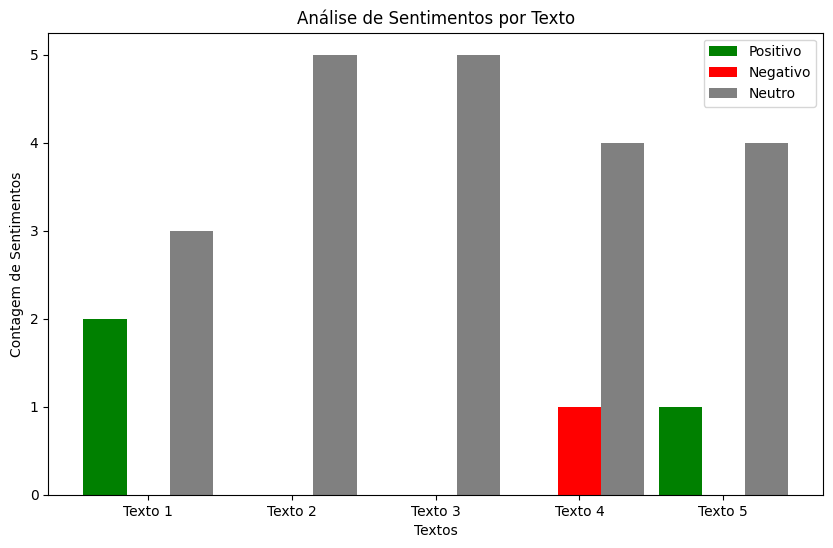

In [ ]:
import matplotlib.pyplot as plt

# Preparando os dados para o gráfico
textos_labels = [f"Texto {i+1}" for i in range(len(resultados))]
positivos = [r['positivo'] for r in resultados]
negativos = [r['negativo'] for r in resultados]
neutros = [r['neutro'] for r in resultados]

# Configurando o gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.3
index = range(len(textos_labels))

# Plotando os gráficos de barras
plt.bar(index, positivos, bar_width, label='Positivo', color='green')
plt.bar([i + bar_width for i in index], negativos, bar_width, label='Negativo', color='red')
plt.bar([i + 2 * bar_width for i in index], neutros, bar_width, label='Neutro', color='grey')

# Configurando os rótulos e título
plt.xlabel('Textos')
plt.ylabel('Contagem de Sentimentos')
plt.title('Análise de Sentimentos por Texto')
plt.xticks([i + bar_width for i in index], textos_labels)
plt.legend()

# Exibindo o gráfico
plt.show()

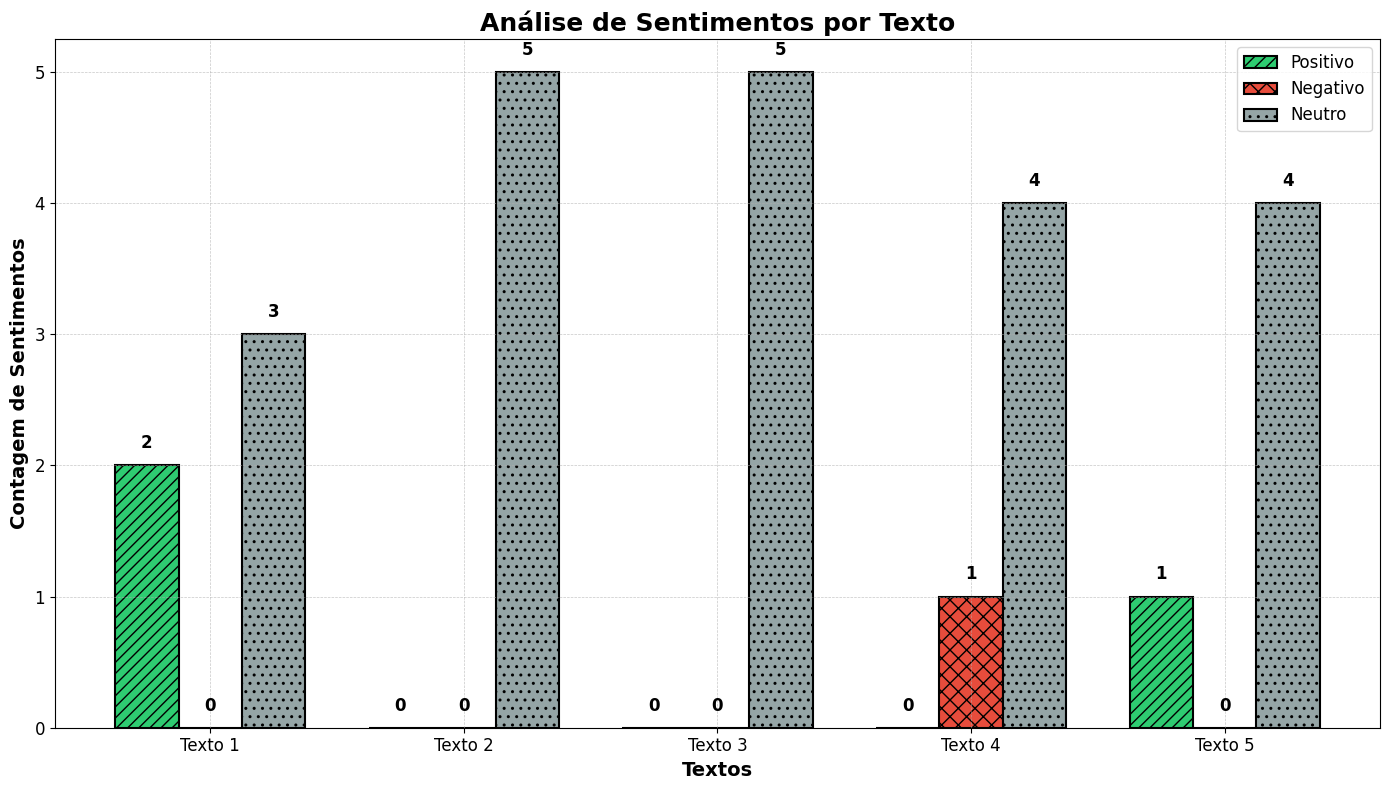

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o gráfico
textos_labels = [f"Texto {i+1}" for i in range(len(resultados))]
positivos = np.array([r['positivo'] for r in resultados])
negativos = np.array([r['negativo'] for r in resultados])
neutros = np.array([r['neutro'] for r in resultados])

# Configuração do gráfico
plt.figure(figsize=(14, 8))
bar_width = 0.25
index = np.arange(len(textos_labels))

# Plotando as barras com mais detalhes e cores mais vibrantes
bars1 = plt.bar(index, positivos, bar_width, label='Positivo', color='#2ecc71', edgecolor='black', linewidth=1.5)
bars2 = plt.bar(index + bar_width, negativos, bar_width, label='Negativo', color='#e74c3c', edgecolor='black', linewidth=1.5)
bars3 = plt.bar(index + 2 * bar_width, neutros, bar_width, label='Neutro', color='#95a5a6', edgecolor='black', linewidth=1.5)

# Adicionando gradientes de cores nas barras
for bar in bars1:
    bar.set_hatch('///')
for bar in bars2:
    bar.set_hatch('xx')
for bar in bars3:
    bar.set_hatch('..')

# Adicionando rótulos de contagem em cima das barras
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.1, '%d' % int(height), ha='center', va='bottom', fontsize=12, fontweight='bold')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Configurando os rótulos e título com fonte estilizada
plt.xlabel('Textos', fontsize=14, fontweight='bold')
plt.ylabel('Contagem de Sentimentos', fontsize=14, fontweight='bold')
plt.title('Análise de Sentimentos por Texto', fontsize=18, fontweight='bold')
plt.xticks(index + bar_width, textos_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Adicionando uma grade de fundo para maior clareza
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()
